### Student Information
Name: Wannipa Pornbunditwong

Student ID: 110065425

GitHub ID: wannipap

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

# 1. The Data

 This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015
Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment.

In [1]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
#import library 
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np

## 2. Data Preparation

2.1 import each files into data frame (data file doesn't contain column name so give them header names)

In [3]:
columnname=["sentence","score"]
amazon = pd.read_table("C:\\Users\\Ae\\Downloads\\sentiment labelled sentences\\sentiment labelled sentences\\amazon_cells_labelled.txt",header=None,names=columnname)
imdb= pd.read_table("C:\\Users\\Ae\\Downloads\\sentiment labelled sentences\\sentiment labelled sentences\\imdb_labelled.txt",header=None,names=columnname)
yelp= pd.read_table("C:\\Users\\Ae\\Downloads\\sentiment labelled sentences\\sentiment labelled sentences\\yelp_labelled.txt",header=None,names=columnname)

2.2 give company names into new column.

In [4]:
amazon['company'] ="amazon"
imdb['company'] ="imdb"
yelp['company'] ="yelp"

2.3 Merge all data togeteher for analyze & check lenght of the data

In [5]:
alldata=amazon.append([imdb,yelp])
print(len(alldata))

2748


Try display data

In [6]:
alldata[0:1]

,sentence,score,company
0,So there is no way for me to plug it in here i...,0,amazon


In [7]:
# a simple query
alldata[0:10][["sentence", "company"]]

,sentence,company
0,So there is no way for me to plug it in here i...,amazon
1,"Good case, Excellent value.",amazon
2,Great for the jawbone.,amazon
3,Tied to charger for conversations lasting more...,amazon
4,The mic is great.,amazon
5,I have to jiggle the plug to get it to line up...,amazon
6,If you have several dozen or several hundred c...,amazon
7,If you are Razr owner...you must have this!,amazon
8,"Needless to say, I wasted my money.",amazon
9,What a waste of money and time!.,amazon


2.4 transform data score into column feel add text length into column

In [8]:
alldata['feel'] = np.where(alldata['score']==0, 'negative', 'positive')
alldata['Text_length']  = alldata['sentence'].str.len()

In [9]:
alldata

,sentence,score,company,feel,Text_length
0,So there is no way for me to plug it in here i...,0,amazon,negative,82
1,"Good case, Excellent value.",1,amazon,positive,27
2,Great for the jawbone.,1,amazon,positive,22
3,Tied to charger for conversations lasting more...,0,amazon,negative,79
4,The mic is great.,1,amazon,positive,17
...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,yelp,negative,66
996,Appetite instantly gone.,0,yelp,negative,24
997,Overall I was not impressed and would not go b...,0,yelp,negative,50
998,"The whole experience was underwhelming, and I ...",0,yelp,negative,91


Check for the missing Value

In [10]:
alldata.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,company,feel,Text_length
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0


check for the Duplicate Data

Drop the duplicated row

In [11]:
duplicateRows = alldata[alldata.duplicated()]
print(duplicateRows)

                                              sentence  score company  \
285                                      Great phone!.      1  amazon   
407                                       Works great.      1  amazon   
524                                      Works great!.      1  amazon   
543                            Don't buy this product.      0  amazon   
744  If you like a loud buzzing to override all you...      0  amazon   
748                                      Does not fit.      0  amazon   
778                              This is a great deal.      1  amazon   
792                                       Great Phone.      1  amazon   
892                   Excellent product for the price.      1  amazon   
896                                       Great phone.      1  amazon   
165                   Definitely worth checking out.        1    imdb   
387                                 Not recommended.        0    imdb   
590                                            10/1

In [12]:
alldata.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
print(len(alldata))

2714


# Data Preprocessing

#5.1 Sampling

In [13]:
alldata_sample = alldata.sample(n=1000)

In [14]:
len(alldata_sample)

1000

In [15]:
alldata_sample[0:]

,sentence,score,company,feel,Text_length
619,I will not return.,0,yelp,negative,18
54,I love this thing!,1,amazon,positive,18
540,The plot has more holes than a pair of fishnet...,0,imdb,negative,117
523,I had to go to a store and bought a new NOKIA ...,1,amazon,positive,75
339,It is practically useless and did not add any ...,0,amazon,negative,94
...,...,...,...,...,...
730,"The food was barely lukewarm, so it must have ...",0,yelp,negative,104
810,The server was very negligent of our needs and...,0,yelp,negative,109
726,This case has passed the one year mark and whi...,1,amazon,positive,95
527,The noise shield is incrediable.,1,amazon,positive,32


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

see feel distribution between sample and original plot in graph.

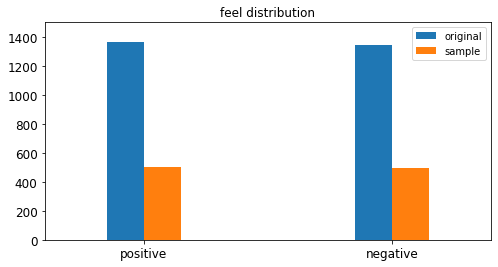

In [17]:
upper_bound = max(alldata.feel.value_counts()) * 1.1
import numpy as np;np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
#concat count of category from X and x_sample and input it in another dataset  then plot graph from that dataset.
combine = pd.concat([alldata.feel.value_counts(), alldata_sample.feel.value_counts()], axis=1)
combine.columns = ["original", "sample"]
combine.plot(kind="bar",title = 'feel distribution',ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,4),width=0.3)
plt.show()

In [18]:
alldata

,sentence,score,company,feel,Text_length
0,So there is no way for me to plug it in here i...,0,amazon,negative,82
1,"Good case, Excellent value.",1,amazon,positive,27
2,Great for the jawbone.,1,amazon,positive,22
3,Tied to charger for conversations lasting more...,0,amazon,negative,79
4,The mic is great.,1,amazon,positive,17
...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,yelp,negative,66
996,Appetite instantly gone.,0,yelp,negative,24
997,Overall I was not impressed and would not go b...,0,yelp,negative,50
998,"The whole experience was underwhelming, and I ...",0,yelp,negative,91


plot graph to see the distribution of data between 3 companies

company  feel    
amazon   negative    494
         positive    486
imdb     positive    382
         negative    360
yelp     positive    498
         negative    494
Name: feel, dtype: int64


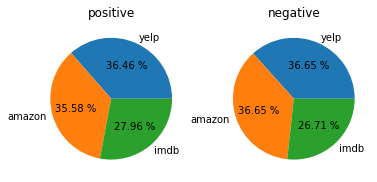

In [19]:
plt.subplot(1,2,1)
pos=alldata.loc[(alldata['feel']=='positive')]
label=["yelp","amazon","imdb"]
p=pos.company.value_counts()
aaa=plt.pie(p,labels=label,autopct='%.2f %%')
plt.title('positive')
plt.subplot(1, 2, 2)
neg=alldata.loc[(alldata['feel']=='negative')]
label=["yelp","amazon","imdb"]
n=neg.company.value_counts()
sss=plt.pie(n,labels=label,autopct='%.2f %%')
plt.title('negative')
print(alldata.groupby('company')['feel'].value_counts())

Try to use the wordcloud to see the frequency of words in each emotion and for each company to see if there are any unique words.

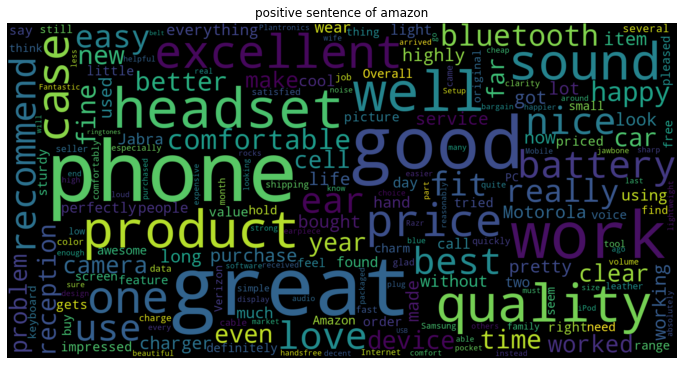

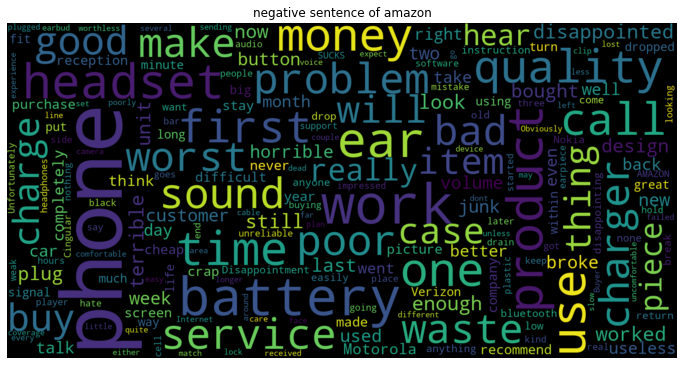

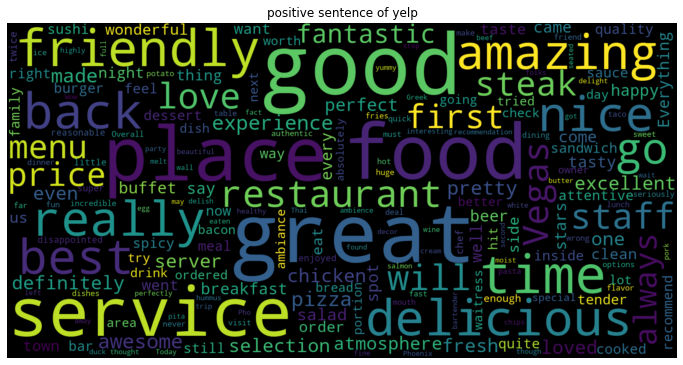

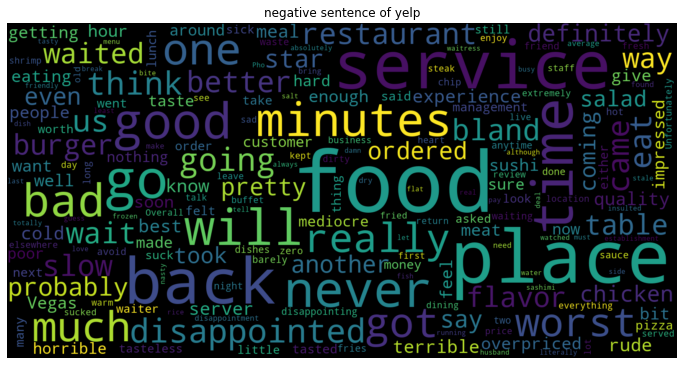

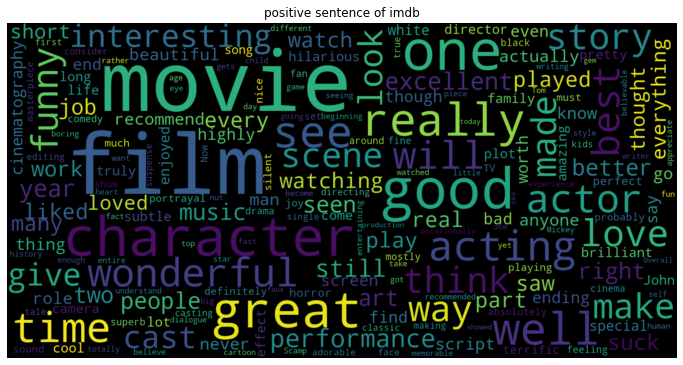

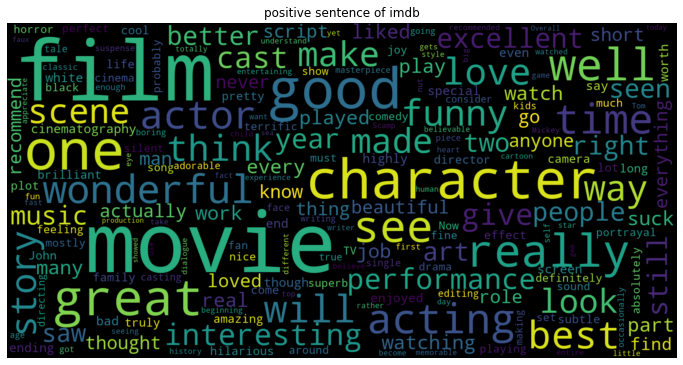

In [20]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
amazon_positive = alldata[(alldata.feel == 'positive')&(alldata.company== 'amazon')]
amazon_positive_string = []
for t in amazon_positive.sentence:
    amazon_positive_string.append(t)
amazon_positive_string = pd.Series(amazon_positive_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,collocations=False).generate(amazon_positive_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("positive sentence of amazon")
plt.show()
amazon_negative = alldata[(alldata.feel == 'negative')&(alldata.company== 'amazon')]
amazon_negative_string = []
for t in amazon_negative.sentence:
    amazon_negative_string.append(t)
amazon_negative_string = pd.Series(amazon_negative_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,collocations=False).generate(amazon_negative_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("negative sentence of amazon")
plt.show()

yelp_positive = alldata[(alldata.feel == 'positive')&(alldata.company== 'yelp')]
yelp_positive_string = []
for t in yelp_positive.sentence:
    yelp_positive_string.append(t)
yelp_positive_string = pd.Series(yelp_positive_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,collocations=False).generate(yelp_positive_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("positive sentence of yelp")
plt.show()

yelp_negative = alldata[(alldata.feel == 'negative')&(alldata.company== 'yelp')]
yelp_negative_string = []
for t in yelp_negative.sentence:
    yelp_negative_string.append(t)
yelp_negative_string = pd.Series(yelp_negative_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,collocations=False).generate(yelp_negative_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("negative sentence of yelp")
plt.show()

imdb_positive = alldata[(alldata.feel == 'positive')&(alldata.company== 'imdb')]
imdb_positive_string = []
for t in imdb_positive.sentence:
    imdb_positive_string.append(t)
imdb_positive_string = pd.Series(imdb_positive_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,collocations=False).generate(imdb_positive_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("positive sentence of imdb")
plt.show()

imdb_positive = alldata[(alldata.feel == 'positive')&(alldata.company== 'imdb')]
imdb_positive_string = []
for t in imdb_positive.sentence:
    imdb_positive_string.append(t)
imdb_positive_string = pd.Series(imdb_positive_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,collocations=False).generate(imdb_positive_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("positive sentence of imdb")
plt.show()

# 5.2 Feature Creation

 extract all the words found in each text and append it as a new feature to the pandas dataframe.(tokenizing our text)

In [21]:
import nltk

In [22]:
alldata['unigrams'] = alldata['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [23]:
alldata[0:9]

,sentence,score,company,feel,Text_length,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,negative,82,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,positive,27,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,positive,22,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,negative,79,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,positive,17,"[The, mic, is, great, .]"
5,I have to jiggle the plug to get it to line up...,0,amazon,negative,74,"[I, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,amazon,negative,111,"[If, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,amazon,positive,43,"[If, you, are, Razr, owner, ..., you, must, ha..."
8,"Needless to say, I wasted my money.",0,amazon,negative,35,"[Needless, to, say, ,, I, wasted, my, money, .]"


Feature subset selection

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
alldata_counts = count_vect.fit_transform(alldata.sentence)

look at the term-document matrix we build above

In [26]:
alldata_counts.shape

(2714, 5153)

In [27]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[-10:]

['yucky',
 'yukon',
 'yum',
 'yummy',
 'yun',
 'z500a',
 'zero',
 'zillion',
 'zombie',
 'zombiez']

In [28]:
alldata_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [29]:
fifth=alldata_counts[3:4, 0:100].toarray()
result=np.where(fifth == 1)
print(result[0:])
count_vect.get_feature_names()[45:46]

(array([0], dtype=int64), array([45], dtype=int64))


['45']

In [30]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[20:75]]
plot_y = ["doc_"+ str(i) for i in list(alldata.index)[1600:1650]]
plot_z = alldata_counts[1600:1650, 20:75].toarray()

display word frequency with heatmap

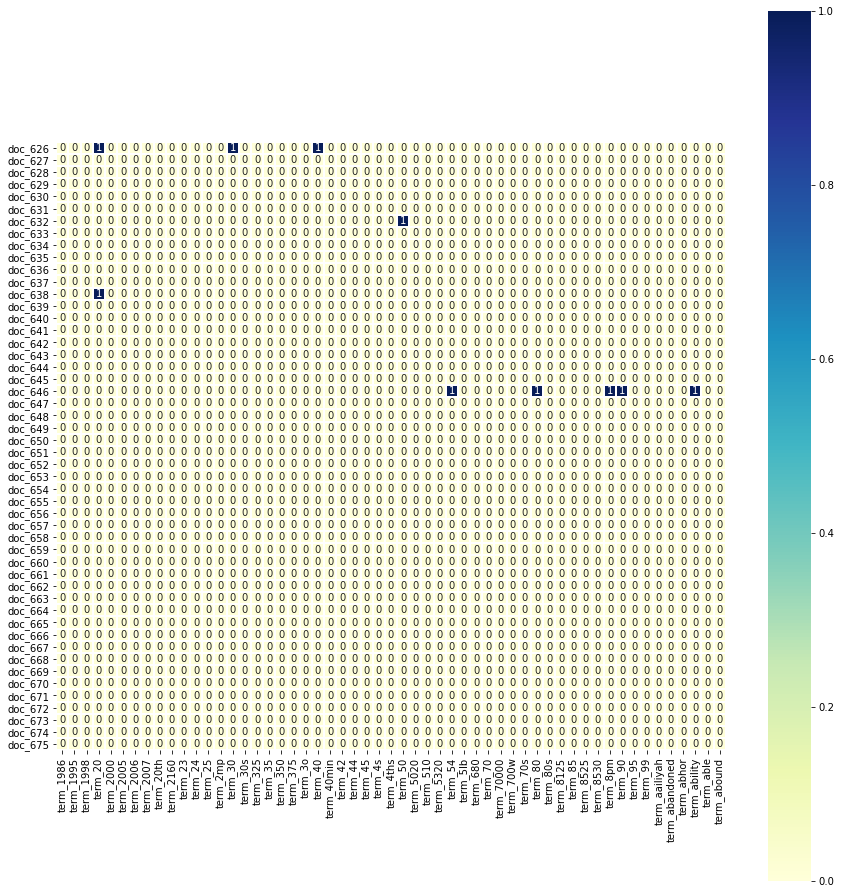

In [31]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 16))
ax = sns.heatmap(df_todraw,
                 cmap="YlGnBu",
                 vmin=0, vmax=1, annot=True, linewidth=1, linecolor='w', square=True)

# 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficeintly reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 
**Input:** Raw term-vector matrix

**Output:** Projections 

In [32]:
from sklearn.decomposition import PCA

In [33]:
alldata_reduced = PCA(n_components = 2).fit_transform(alldata_counts.toarray())

In [34]:
alldata_reduced.shape

(2714, 2)

In [35]:
companies=['amazon', 'imbd', 'yelps']

In [57]:
feel[0]

'negative'

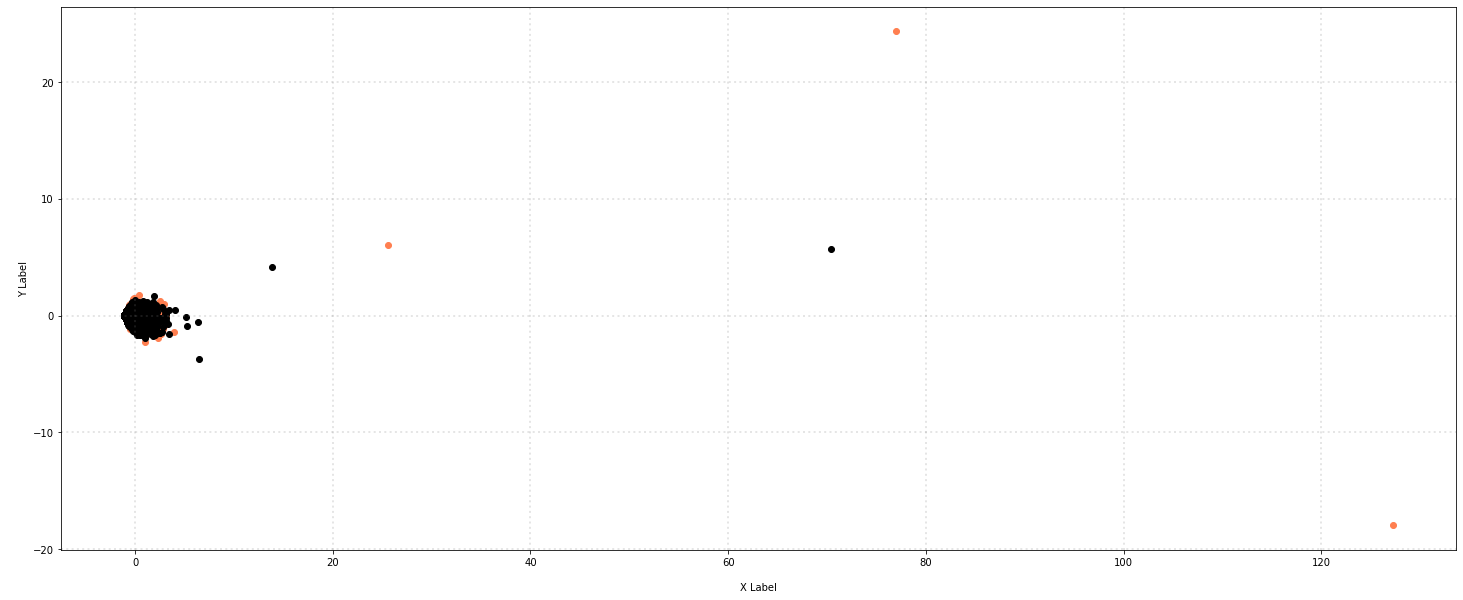

In [59]:
col = ['coral', 'black']
feel = ['negative','positive']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, d in zip(col, feel):
    xs = alldata_reduced[alldata['feel'] == d].T[0]
    ys = alldata_reduced[alldata['feel'] == d].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

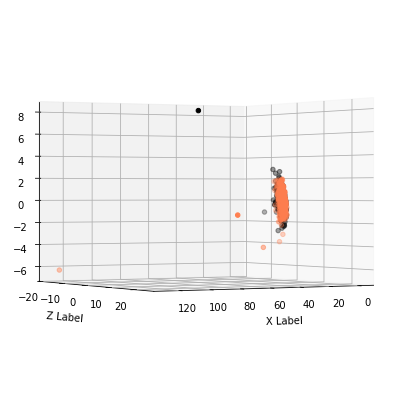

In [63]:
# pca transformation to 3D
alldata_reduced_3d = PCA(n_components = 3).fit_transform(alldata_counts.toarray())

# create 3D scattered plot with different angles
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
for c, s in zip(col, feel):
    xs = alldata_reduced_3d[alldata['feel'] == s].T[0]
    ys = alldata_reduced_3d[alldata['feel'] == s].T[1]
    zs = alldata_reduced_3d[alldata['feel'] == s].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='o')
    
ax.view_init(0, 60)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label') 
ax.set_ylabel('\nY Label')
ax.set_ylabel('\nZ Label')

plt.show()

# 5.5 Atrribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionalaity reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!
First, we need to compute these frequencies for each term in all documents. Visually speaking, we are seeking to add values of the 2D matrix, vertically; i.e., sum of each column. You can also refer to this process as aggregation, which we won't explore further in this notebook because of the type of data we are dealing with. But I believe you get the idea of what that includes.  

In [64]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,alldata_counts.shape[1]):
    term_frequencies.append(sum(alldata_counts[:,j].toarray()))

In [65]:
term_frequencies = np.asarray(alldata_counts.sum(axis=0))[0]

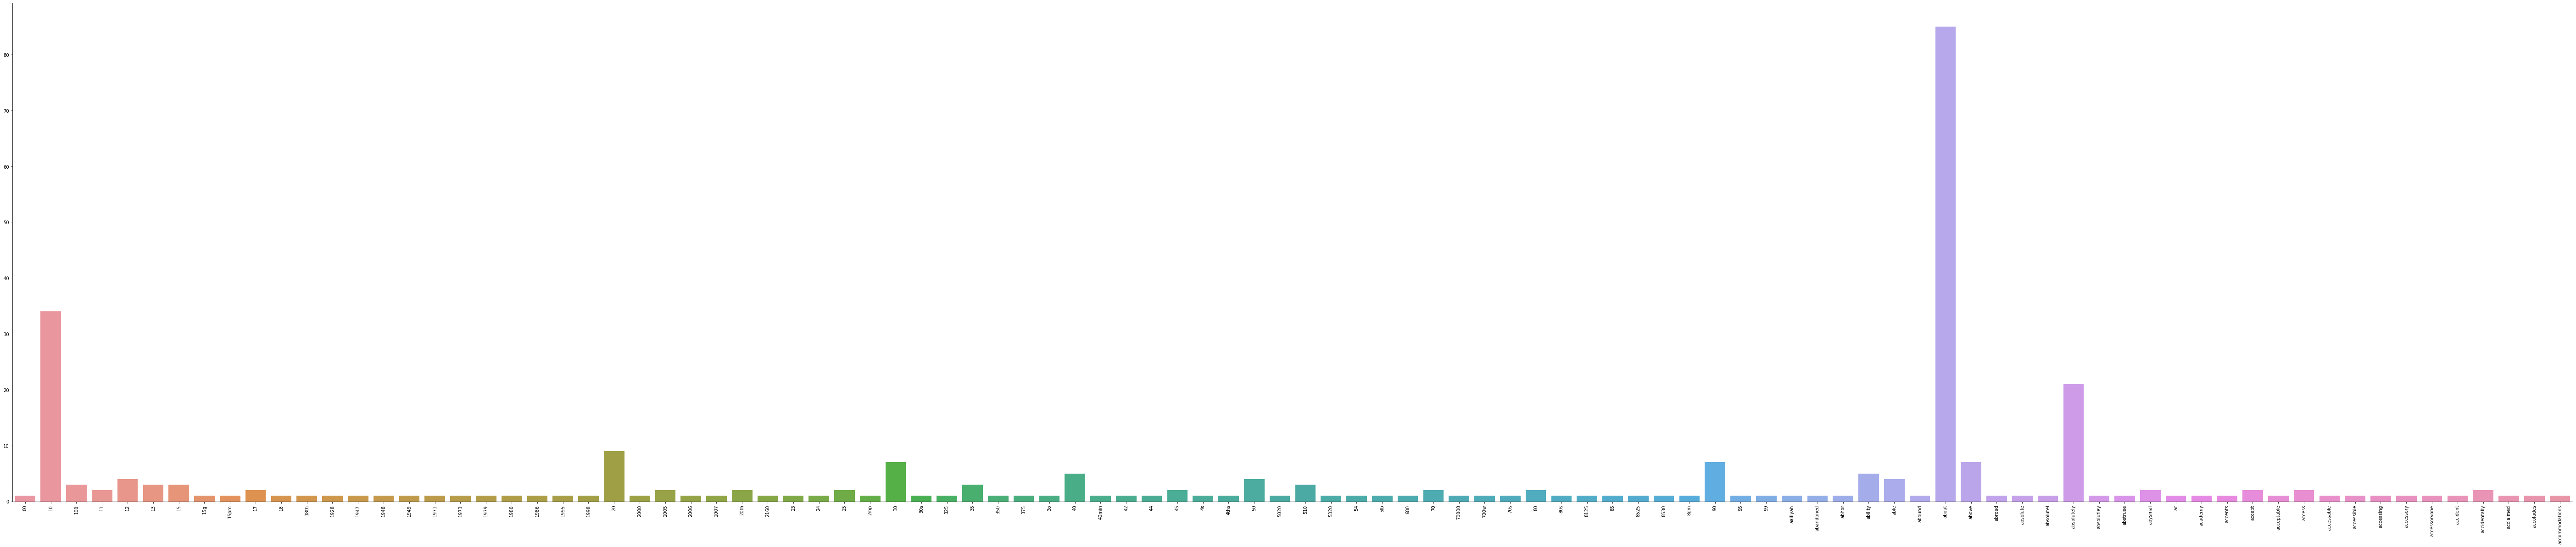

In [66]:
plt.subplots(figsize=(100, 20))
g = sns.barplot(x=count_vect.get_feature_names()[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names()[:100], rotation = 90);

to make it easier to visualize use long tail graph

In [67]:
# generate a simple distribution
count_vect = CountVectorizer(min_df=100)
alldata_counts = count_vect.fit_transform(alldata.sentence)
term_frequencies = []
for j in range(0,alldata_counts.shape[1]):
    term_frequencies.append(sum(alldata_counts[:,j].toarray()))

term_frequencies = np.asarray(alldata_counts.sum(axis=0))[0]

In [68]:
# try to reverse the term_frequencies array
sorted_array = np.sort(term_frequencies)
reverse_array = sorted_array[::-1]


<AxesSubplot:label='303dd478-254d-4314-a725-30d75c3b367a'>

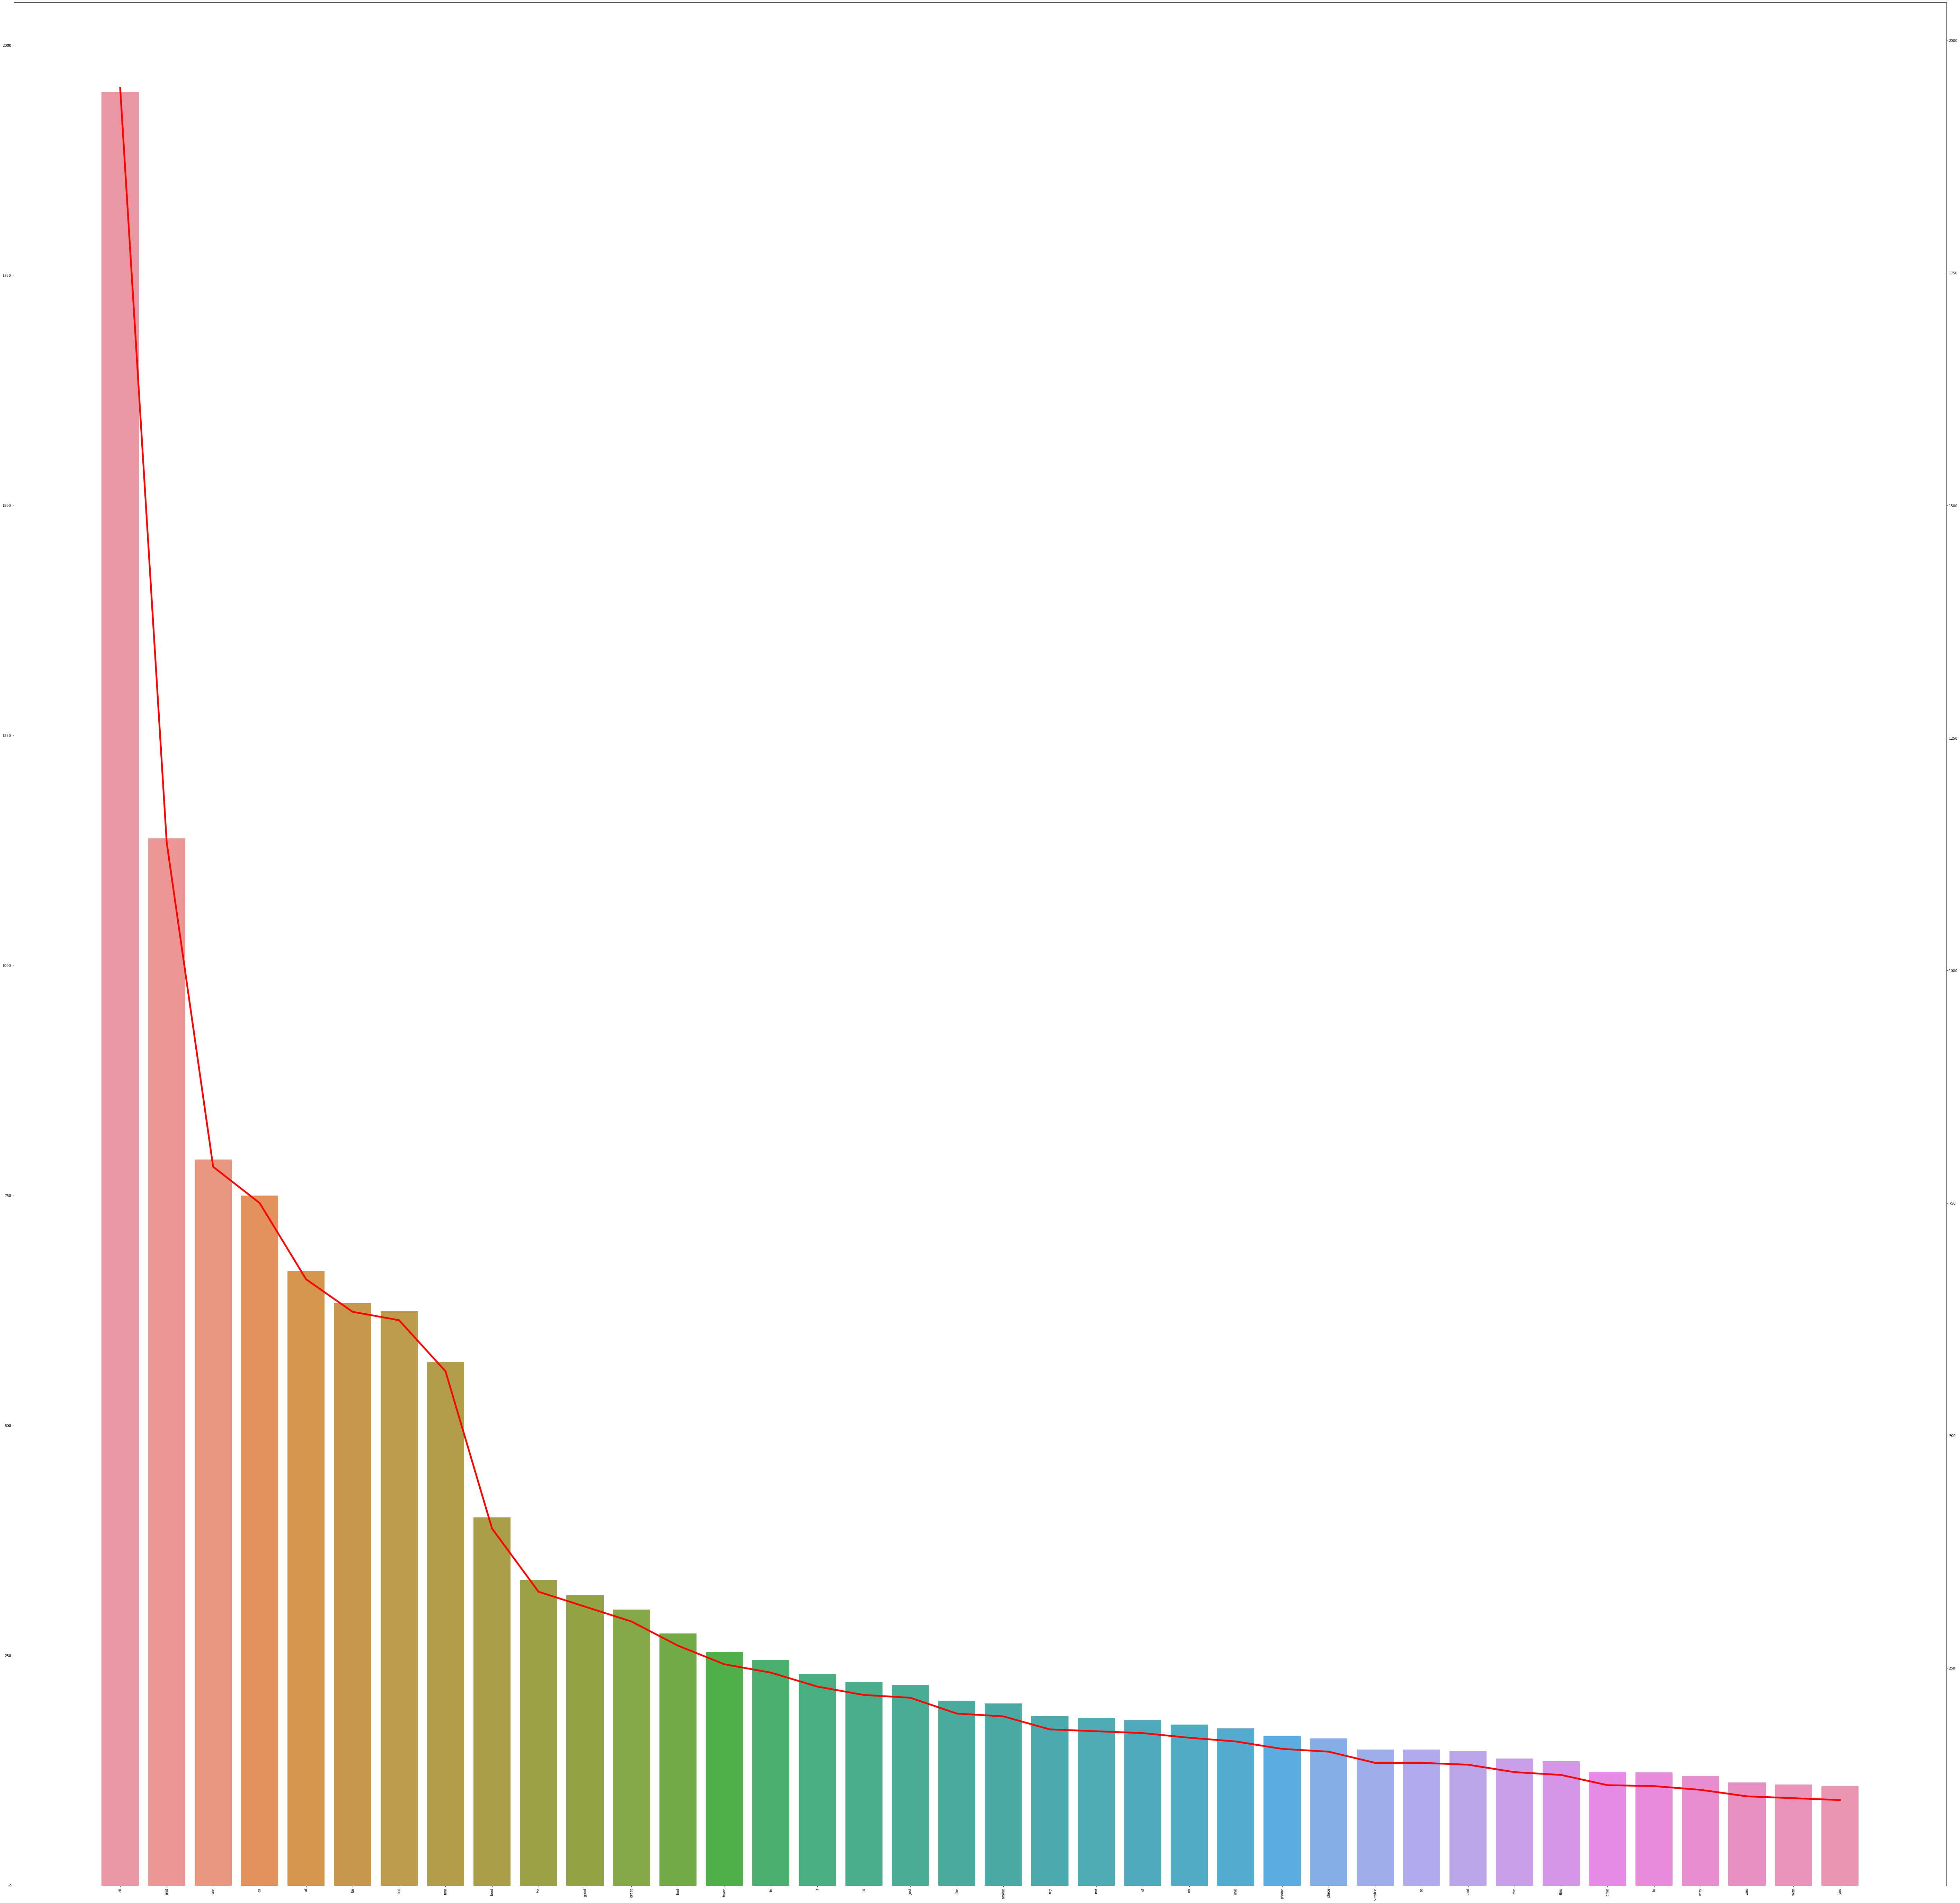

In [69]:
# create a long tail bar
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(100,100))
sns.barplot(x=count_vect.get_feature_names(),
            y=reverse_array, alpha=1.0)

plt.xticks(rotation=90)
ax2 = ax1.twinx()
sns.lineplot(x=count_vect.get_feature_names(),
           y=reverse_array, 
             color='red',linewidth=5)


# 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `company`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [70]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [71]:
mlb = preprocessing.LabelBinarizer()

In [72]:
mlb.fit(alldata.company)

LabelBinarizer()

In [73]:
mlb.classes_

array(['amazon', 'imdb', 'yelp'], dtype='<U6')

In [74]:
alldata['bin_company'] = mlb.transform(alldata['company']).tolist()

transform text data into binary

In [75]:
alldata[0:9]

,sentence,score,company,feel,Text_length,unigrams,bin_company
0,So there is no way for me to plug it in here i...,0,amazon,negative,82,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,positive,27,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,amazon,positive,22,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,negative,79,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,amazon,positive,17,"[The, mic, is, great, .]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon,negative,74,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon,negative,111,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon,positive,43,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon,negative,35,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"


# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [76]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = alldata.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = alldata.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = alldata.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [77]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [78]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0]]


In [79]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# 2. TF-IDF

Generate TF-IDF features from the tokens of each text.

`TfidfVectorizer` creates a dictionary from words provided to it and generates a matrix similar to the one above (X_counts), but rather than containing integer word counts, the matrix contains Term Frequency-Inverse Document Frequency (TFIDF) values between 0.0 and 1.0 reflecting the relative importance of individual words

split the data into train and test 

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(alldata.sentence, alldata.score, test_size=0.25)

get feature use countvectorizer

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
BOW_vectorizer = CountVectorizer(stop_words='english') 
X_train_Countvectorizer = BOW_vectorizer.fit_transform(X_train)
X_test_Countvectorizer =BOW_vectorizer.transform(X_test)

get feature use TF-IDF

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidfvertorizer = TfidfVectorizer(stop_words = "english")
X_train_Tfidf_features = Tfidfvertorizer.fit_transform(X_train)
X_test_Tfidf_features = Tfidfvertorizer.transform(X_test)

In [102]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

use naive_bayes model with feature from countvectorizeer

In [105]:
mnb_counts = MultinomialNB()
mnb_counts.fit(X_test_Countvectorizer, Y_test)

MultinomialNB()

In [108]:
mnb_counts.score(X_test_Countvectorizer, Y_test)

0.93519882179676

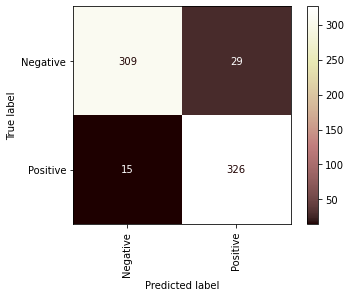

In [109]:
plot_confusion_matrix(mnb_counts, X_test_Countvectorizer, Y_test, display_labels=['Negative', 'Positive'], cmap='pink', xticks_rotation='vertical')

use naive_bayes model with feature from TF-IDF

In [110]:
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_Tfidf_features, Y_train)

MultinomialNB()

In [111]:
mnb_counts.score(X_test_Tfidf_features, Y_test)

0.9410898379970545

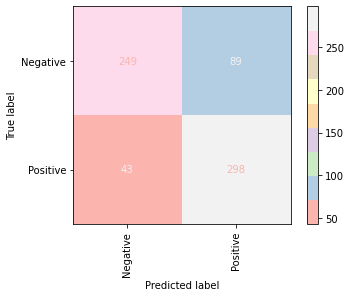

In [115]:
plot_confusion_matrix(mnb_tfidf, X_test_Tfidf_features, Y_test, display_labels=['Negative', 'Positive'], cmap='Pastel1', xticks_rotation='vertical')

# Conclusion

Compare score of both classifiers we can concolude that the second model that used data from tfidf feature perform better than the countvectorizer.

# 4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__

For the first part(part 1-3)
- I think we focus too much for data query (loc, iloc , len etc) I think we can skip some and focus more on the data visualization to gain more insight about the data in each catagory

For the data preprocessing
- I think before the feature creation we should add text cleaning process because text from email may be quiet messy and I think text cleaning part is really important we can do things like:
  
  - Converting the entire text to a uniform lowercase structure
  - Removing the stopwords (when I do the longtail graph it contains a lot of stopwords)
  - Replace Contractions(eg: “ain’t” to  “am not”)
  - Spell Check
  - Remove punctuation
  - Remove numbers
  - Lemmatize (eg: functions,funtionality as function)
  - and so on
  
For the visualization 
- I think the heatmap graph we did in the lab is quiet hard to look/understand I like to use the wordcloud to see the word frequency in each category.
- and we can do more like count the words/len of each email and use the boxplot to see if there are any outliers.
  
